In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X_train = np.loadtxt('X_train.csv')
X_test = np.loadtxt('X_test.csv')
Y_train = np.loadtxt('Y_train.csv')
Y_test = np.loadtxt('Y_test.csv')

In [16]:
def relu(z):
    a = np.maximum(0,z)
    return a

def Linear(z):
    return z

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def initialize_params(layer_sizes):
    params = {}
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

def forward_propagation(X_train, params):
    layers = len(params)//2
    values = {}
    for i in range(1, layers+1):
        if i==1:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            values['A' + str(i)] = relu(values['Z' + str(i)])
        else:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers:
                values['A' + str(i)] = values['Z' + str(i)]
            else:
                values['A' + str(i)] = relu(values['Z' + str(i)])
    return values

def mean_squared_error(Y, YH):
    return np.square(Y - YH).mean()

def compute_cost(values, Y_train):
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
    return cost

def backward_propagation(params, values, X_train, Y_train):
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

def update_params(params, grads, learning_rate):
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

def model(X_train, Y_train, layer_sizes, num_iters, learning_rate):
    
    def train_accuracy(X_train, Y_train):
        values_train = forward_propagation(X_train.T, params)
        train_acc = np.sqrt(mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T))
        return train_acc
                       
    params = initialize_params(layer_sizes)
    error = []
    acc = []
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        cost = compute_cost(values, Y_train.T)
        accuracy = train_accuracy(X_train, Y_train)
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        if i % 100 == 0 or i == num_iters-1:
            print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
        error.append(cost)
        acc.append(accuracy)
        
    print('average_cost: ', np.sum(np.array(error))/num_iters)
    
    return params, np.array(error), np.array(acc)

def compute_accuracy(X_train, X_test, Y_train, Y_test, params):
    values_train = forward_propagation(X_train.T, params)
    values_test = forward_propagation(X_test.T, params)
    train_acc = np.sqrt(mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T))
    test_acc = np.sqrt(mean_squared_error(Y_test, values_test['A' + str(len(layer_sizes)-1)].T))
    return train_acc, test_acc

def predict(X, params):
    values = forward_propagation(X.T, params)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

In [17]:
layer_sizes = [2, 8, 1]                                                           #set layer sizes
num_iters = 2000                                                                  #set epochs
learning_rate = 0.03                                                              #set learning rate
params, error, accuracy = model(X_train, Y_train, layer_sizes, num_iters, learning_rate)           #train the model
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params)  #get accuracy
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))

Cost at iteration 1 = 2858.2434583901504

Cost at iteration 101 = 2856.007337663761

Cost at iteration 201 = 2838.9526331605825

Cost at iteration 301 = 2282.7692334129856

Cost at iteration 401 = 796.7852180204072

Cost at iteration 501 = 175.34388396287474

Cost at iteration 601 = 64.01639927486661

Cost at iteration 701 = 35.05886373296207

Cost at iteration 801 = 22.29169402756539

Cost at iteration 901 = 15.726248477358084

Cost at iteration 1001 = 12.593125484073841

Cost at iteration 1101 = 11.353594501193463

Cost at iteration 1201 = 11.125304858707999

Cost at iteration 1301 = 11.412909252535206

Cost at iteration 1401 = 11.917387462528472

Cost at iteration 1501 = 12.453750155209077

Cost at iteration 1601 = 12.937647478453371

Cost at iteration 1701 = 13.316941001284038

Cost at iteration 1801 = 13.610614507420703

Cost at iteration 1901 = 13.834133858112935

Cost at iteration 2000 = 13.994709860970973

average_cost:  529.222753659563
Root Mean Squared Error on Training Data

Text(0.5, 1.0, 'Error curve')

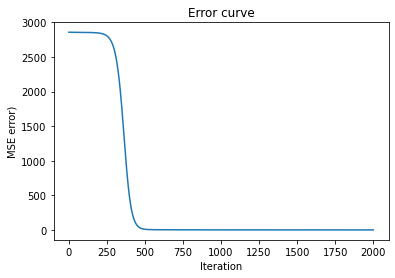

In [60]:
plt.plot(np.linspace(1,2000,2000), error)
plt.xlabel('Iteration')
plt.ylabel('MSE error')
plt.title('Error curve')

Text(0.5, 1.0, 'Accuracy curve')

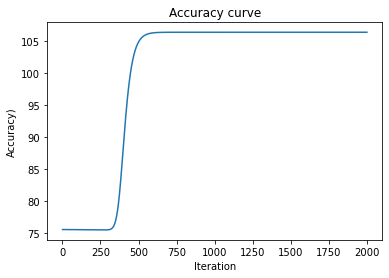

In [61]:
plt.plot(np.linspace(1,2000,2000), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy curve')

## Question

Answer the following questions:
1. What is the activation function that you will choose for the output layer? Justify your answer
briefly.
2. How many neurons should there be in the output layer? Why?
3. Report the average MSE loss and the accuracy.
4. Plot the loss and accuracy as a function of the number of iterations.
5. What is the effect of the learning rate on the training process? Vary the learning rate to be
between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.
6. What is the effect of the number of neurons in the hidden layer? To answer this question,
you will need to consider and answer the following:
a. You will need to vary the number of neurons from 1 to 10. Does the update rule
need to be changed/derived again? Why or why not?
b. Report your observations by reporting the final loss and plotting the true labels and
your predicted labels, along with a brief (2-3 lines) description.
7. What is the effect of the activation functions in the network? Explore two different activation
functions other than sigmoid such as tanh, linear, or ReLU.
a. Will you need to change the update rule?
b. What is the change that you need to make to achieve this experiment?
c. Report your observations by reporting the final loss and plotting the true labels and
your predicted labels, along with a brief (2-3 lines) description.

## Answers

1. I would use a relu activation fucntion since caps the output between 0 to infinity.

2. There would be only one neuron in the output layers as it is just predicting a singlular value.

3. The lowest MSE obtained was 0.579 and the average MSE is 485.885.
Root Mean Squared Error on Training Data = 106.315
Root Mean Squared Error on Test Data = 104.963

### 4. Ans:

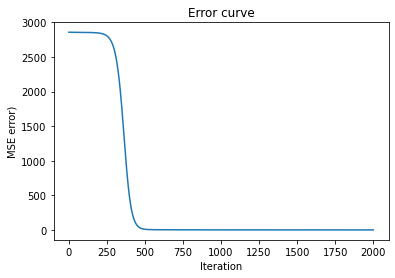

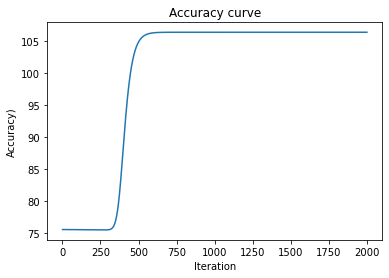

In [63]:
plt.plot(np.linspace(1,2000,2000), error)
plt.xlabel('Iteration')
plt.ylabel('MSE error)')
plt.title('Error curve')
plt.show()
plt.plot(np.linspace(1,2000,2000), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy curve')
plt.show()

### 5. Ans:
Learning rate is important for reaching convergence and also to select the optimum number of epochs.

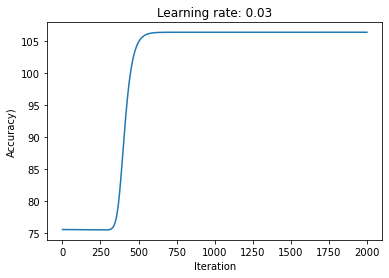

In [70]:
plt.plot(np.linspace(1,2000,2000), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy)')
plt.title('Learning rate: %.2f' %learning_rate)
plt.show()

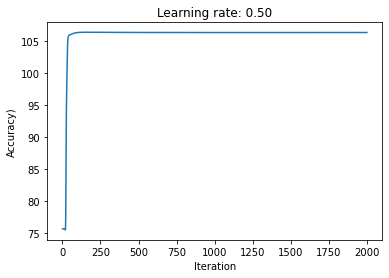

In [72]:
plt.plot(np.linspace(1,2000,2000), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy)')
plt.title('Learning rate: %.2f' %learning_rate)
plt.show()

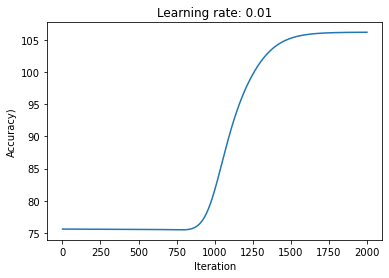

In [74]:
plt.plot(np.linspace(1,2000,2000), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy)')
plt.title('Learning rate: %.2f' %learning_rate)
plt.show()

### 6. Ans:
layer_sizes = [2, 8, 1]  
where the second value is the number of neurons in my code. For me 8 neurons were my optimal neurons.
Varying the neurons did not change my update rule as they are multiplied with the bias and summed up once for only 1 hidden layer. However if I reduce the number of neurons, my model will be underfit and too many of them will make it overfit.

Cost at iteration 1 = 2858.3597535268773

Cost at iteration 101 = 2857.7174002648203

Cost at iteration 201 = 2857.08289890323

Cost at iteration 301 = 2856.43971358983

Cost at iteration 401 = 2855.7289314076374

Cost at iteration 501 = 2854.7332746458364

Cost at iteration 601 = 2852.6482911137928

Cost at iteration 701 = 2846.5060823584304

Cost at iteration 801 = 2825.5060330361002

Cost at iteration 901 = 2752.221539554072

Cost at iteration 1001 = 2518.302496455671

Cost at iteration 1101 = 1973.5442032202616

Cost at iteration 1201 = 1369.2168831722508

Cost at iteration 1301 = 1162.7530796055046

Cost at iteration 1401 = 1161.6176889908756

Cost at iteration 1501 = 1179.0429915479301

Cost at iteration 1601 = 1191.220220736854

Cost at iteration 1701 = 1198.199647252695

Cost at iteration 1801 = 1201.5475678925413

Cost at iteration 1901 = 1203.239860665555

average_cost:  2087.830324281747
Root Mean Squared Error on Training Data = 93.50917837661795
Root Mean Squared Error on 

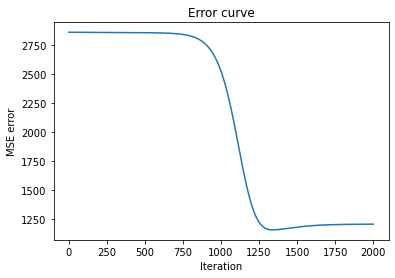

In [81]:
layer_sizes = [2, 2, 1]                                                           #set layer sizes
num_iters = 2000                                                                  #set epochs
learning_rate = 0.01                                                              #set learning rate
params, error, accuracy = model(X_train, Y_train, layer_sizes, num_iters, learning_rate)           #train the model
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params)  #get accuracy
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))

plt.plot(np.linspace(1,2000,2000), error)
plt.xlabel('Iteration')
plt.ylabel('MSE error')
plt.title('Error curve')
plt.show()

Cost at iteration 1 = 2858.416060962643

Cost at iteration 101 = 2857.7306456372994

Cost at iteration 201 = 2856.995796719215

Cost at iteration 301 = 2856.0350045617693

Cost at iteration 401 = 2854.2702242228984

Cost at iteration 501 = 2849.7030866281216

Cost at iteration 601 = 2835.344342013604

Cost at iteration 701 = 2787.067290297218

Cost at iteration 801 = 2628.4776571450134

Cost at iteration 901 = 2189.157546395628

Cost at iteration 1001 = 1437.5649123449184

Cost at iteration 1101 = 847.2985161369223

Cost at iteration 1201 = 511.5026418483349

Cost at iteration 1301 = 267.51500993444375

Cost at iteration 1401 = 129.38086808511758

Cost at iteration 1501 = 74.02913623991263

Cost at iteration 1601 = 52.72818264414735

Cost at iteration 1701 = 41.543731446381656

Cost at iteration 1801 = 33.87264697329951

Cost at iteration 1901 = 27.888463106850555

average_cost:  1479.6667509858603
Root Mean Squared Error on Training Data = 105.98729653135808
Root Mean Squared Error on

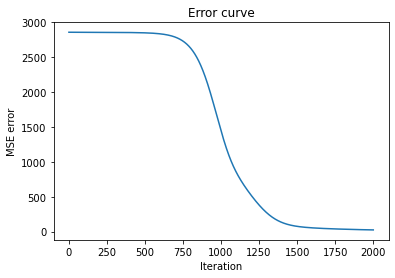

In [80]:
layer_sizes = [2, 12, 1]                                                           #set layer sizes
num_iters = 2000                                                                  #set epochs
learning_rate = 0.01                                                              #set learning rate
params, error, accuracy = model(X_train, Y_train, layer_sizes, num_iters, learning_rate)           #train the model
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params)  #get accuracy
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))

plt.plot(np.linspace(1,2000,2000), error)
plt.xlabel('Iteration')
plt.ylabel('MSE error')
plt.title('Error curve')
plt.show()

### 7. Ans:

#### Using Linear activation function

In [83]:
layer_sizes = [2, 8, 1]                                                           #set layer sizes
num_iters = 2000                                                                  #set epochs
learning_rate = 0.01                                                              #set learning rate
params, error, accuracy = model(X_train, Y_train, layer_sizes, num_iters, learning_rate)           #train the model
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params)  #get accuracy
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))

Cost at iteration 1 = 2858.24792840912

Cost at iteration 101 = 2857.463220691965

Cost at iteration 201 = 2856.4181544484723

Cost at iteration 301 = 2854.3170396936425

Cost at iteration 401 = 2848.310212508952

Cost at iteration 501 = 2828.062271706302

Cost at iteration 601 = 2757.170388236457

Cost at iteration 701 = 2523.1535939671176

Cost at iteration 801 = 1919.033599016181

Cost at iteration 901 = 1062.9485085783795

Cost at iteration 1001 = 537.8584845571482

Cost at iteration 1101 = 298.4454397078962

Cost at iteration 1201 = 156.76658936194565

Cost at iteration 1301 = 72.1131997660772

Cost at iteration 1401 = 30.50193259643772

Cost at iteration 1501 = 11.805785080604705

Cost at iteration 1601 = 4.271307274617921

Cost at iteration 1701 = 1.4794111022815195

Cost at iteration 1801 = 0.499260797323705

Cost at iteration 1901 = 0.16594292128374072

average_cost:  1253.2092720550236
Root Mean Squared Error on Training Data = 106.18274722953194
Root Mean Squared Error on Te

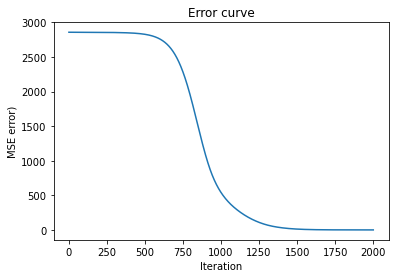

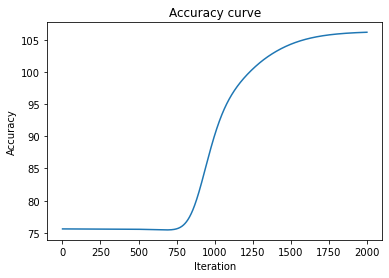

In [84]:
plt.plot(np.linspace(1,2000,2000), error)
plt.xlabel('Iteration')
plt.ylabel('MSE error)')
plt.title('Error curve')
plt.show()
plt.plot(np.linspace(1,2000,2000), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy curve')
plt.show()

#### Using sigmoid activation function

In [86]:
layer_sizes = [2, 8, 1]                                                           #set layer sizes
num_iters = 2000                                                                  #set epochs
learning_rate = 0.01                                                              #set learning rate
params, error, accuracy = model(X_train, Y_train, layer_sizes, num_iters, learning_rate)           #train the model
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params)  #get accuracy
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))

Cost at iteration 1 = 2858.3014831876576

Cost at iteration 101 = 2856.219890405329

Cost at iteration 201 = 2853.200282650468

Cost at iteration 301 = 2847.634767337792

Cost at iteration 401 = 2836.4703108064664

Cost at iteration 501 = 2814.4101972353233

Cost at iteration 601 = 2774.9108691933075

Cost at iteration 701 = 2715.1354565961433

Cost at iteration 801 = 2640.430056591507

Cost at iteration 901 = 2560.686096101852

Cost at iteration 1001 = 2483.6595899764757

Cost at iteration 1101 = 2412.836806601156

Cost at iteration 1201 = 2348.733769283071

Cost at iteration 1301 = 2290.6589967886243

Cost at iteration 1401 = 2237.740800443912

Cost at iteration 1501 = 2189.247181297223

Cost at iteration 1601 = 2144.5886241950566

Cost at iteration 1701 = 2103.2688564649893

Cost at iteration 1801 = 2064.866342179349

Cost at iteration 1901 = 2029.0417705074753

average_cost:  2481.8757414734
Root Mean Squared Error on Training Data = 77.15971093718484
Root Mean Squared Error on Tes

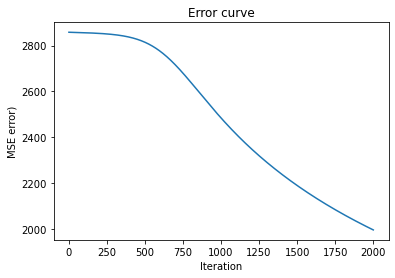

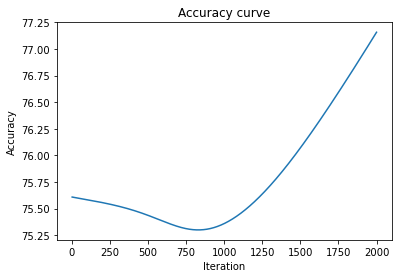

In [87]:
plt.plot(np.linspace(1,2000,2000), error)
plt.xlabel('Iteration')
plt.ylabel('MSE error)')
plt.title('Error curve')
plt.show()
plt.plot(np.linspace(1,2000,2000), accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy curve')
plt.show()

Two different activation fuction linear and sigmoid was used by me to observe the changes. Linear activation fuction gets close to the performance of relu but the convergence speed is slow. So the MSE decreases slowly.
Sigmoid has a adverse effect in this problem. So, the MSE stay pretty high and the accuracy does not get very close to the best accuracy obtained in other methods.